# Problem Description

- The competition is called : **Corporacion Favorita Grocery Sales Forecasting**.
- The task is to predict sales in the stores of an Ecuadorian supermarket chain so that they can avoid overstocking.
- The given data is a table with the following variables/features: date, store id, item id, sales volume, promotion.
- We can see the data as N time series, one per (store, item) combination. Many of these time series are most likely correlated to each other and some sort of <b>dimensional reduction</b> will be most welcome here. 
- The company also offers some other data sets, such as a list of stores, a time series of daily transactions per store, a list of holidays and events, a list of products by category, and the price of oil, of which a good chunk of the ecuadorian economy is allegedly tied to. These are additional tools to simplify and/or enhance the predictions, and some other external data could also be used in this regard. 

# Set-up

In [25]:
# DATA MANIPULATION
import numpy as np # linear algebra
import random as rd # generating random numbers
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime # manipulating date formats

# VIZUALIZATION
import matplotlib.pyplot as plt # basic plotting
%matplotlib inline

In [26]:
# Read data
dtypes = {'id':'int64', 'item_nbr':'int32', 'store_nbr':'int8', 'onpromotion':str}
train=pd.read_csv('../input/processed/train_min.csv', parse_dates=['date'])

In [33]:
train[train.date>='2017-01-01'].head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
1012296,101732684,2017-01-02,21,103501,9.0,False
1012297,101732685,2017-01-02,21,103520,4.0,False
1012298,101732686,2017-01-02,21,103665,2.0,False
1012299,101732687,2017-01-02,21,105576,7.0,False
1012300,101732688,2017-01-02,21,105693,6.0,False


# Explore

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687623 entries, 0 to 1687622
Data columns (total 6 columns):
id             1687623 non-null int64
date           1687623 non-null datetime64[ns]
store_nbr      1687623 non-null int64
item_nbr       1687623 non-null int64
unit_sales     1687623 non-null float64
onpromotion    1687623 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(1), int64(3)
memory usage: 66.0 MB


In [30]:
train.describe()

,id,store_nbr,item_nbr,unit_sales
count,1.687623e+06,1.687623e+06,1.687623e+06,1.687623e+06
mean,9.591106e+07,2.489958e+01,1.106213e+06,5.758421e+00
std,1.699229e+07,5.262003e+00,5.622707e+05,3.343105e+01
min,6.649814e+07,2.100000e+01,1.035010e+05,-1.000200e+04
25%,8.126019e+07,2.100000e+01,6.389770e+05,1.000000e+00
50%,9.580699e+07,2.100000e+01,1.137146e+06,3.000000e+00
75%,1.105373e+08,3.200000e+01,1.463935e+06,6.000000e+00
max,1.254515e+08,3.200000e+01,2.124052e+06,1.714600e+04


# Target variable

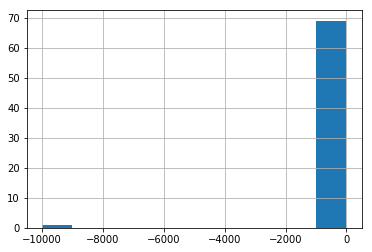

In [32]:
## There are negative values???
train[train.unit_sales<0].unit_sales.hist()

In [21]:
train[train.unit_sales<0].head(10)

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
73203,69022432,2016-01-29,21,172995,-1.000,False
80235,69220392,2016-01-31,21,1463857,-3.000,False
90993,69607091,2016-02-04,21,1239856,-0.406,False
193049,73208230,2016-03-13,21,1049595,-3.000,False
199061,73399370,2016-03-15,21,1913596,-2.000,False
244739,75019669,2016-04-01,32,940592,-1.000,False
296550,76846152,2016-04-20,21,1463786,-27.000,False
301824,77034839,2016-04-22,21,1328495,-7.000,False
318296,77600504,2016-04-28,21,1696025,-29.000,False
327390,77911280,2016-05-01,32,581742,-4.000,False


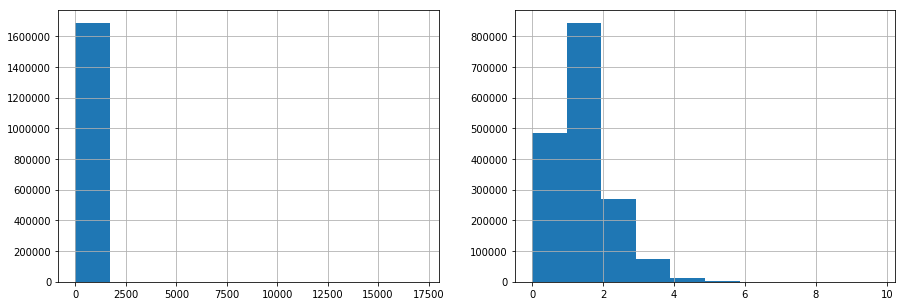

In [35]:
## Transform target variable
train.loc[train.unit_sales < 0., 'unit_sales'] = 0.
train['unit_sales_log1p'] = np.log1p(train.unit_sales)

# Histograms
plt.figure(figsize=(15,5))
train.unit_sales.hist(ax=plt.subplot(1,2,1))
train.unit_sales_log1p.hist(ax=plt.subplot(1,2,2))

# EDA

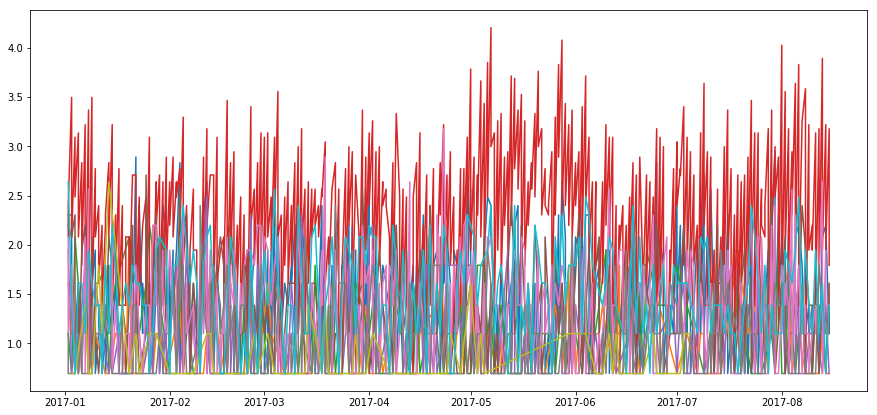

In [36]:
plt.figure(figsize=(15,7))

for item in sorted(train.item_nbr.unique())[:10]:
    #print(item)
    df = train[(train.item_nbr==item) & (train.date>='2017-01-01')]
    ts = pd.Series(df['unit_sales_log1p'].values, index = df.date)
    plt.plot(ts, label='Item %s'%(item))
    
plt.show()